In [1]:
import numpy as np
import numpy.random as random
import scipy as sp
from pandas import Series, DataFrame
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
%matplotlib inline

import sklearn

%precision 3

'%.3f'

상관계수 : 0.889


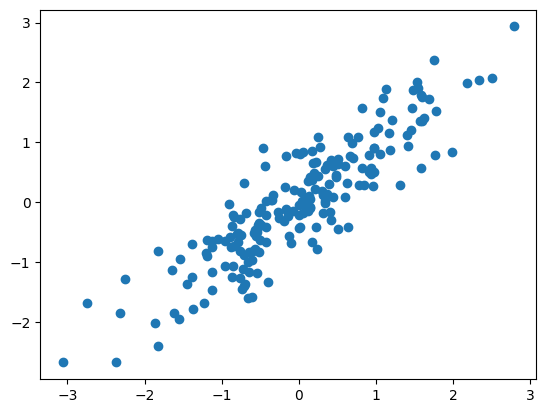

In [2]:
from sklearn.preprocessing import StandardScaler

# RandomState 객체 생성
sample = np.random.RandomState(1)

# 두 개의 난수 생성
X = np.dot(sample.rand(2, 2), sample.randn(2, 200)).T

#표준화
sc= StandardScaler()
X_std = sc.fit_transform(X)

# 상관계수 계산 및 그래프 출력
print('상관계수 : {:.3f}'.format(sp.stats.pearsonr(X_std[:, 0], X_std[:, 1])[0]))
plt.scatter(X_std[:,0], X_std[:, 1])

__주성분 분석 실행__

sklearn.decomposition 모듈의 PCA 클래스를 이용한다.
객체를 초기화할 때 변수를 몇 차원으로 축소할지(추출하려는 주성분의 수를 n_components로 지정) 설정한다.
추출하려는 주성분의 수는 원래 변수의 개수보다 작은 수로 설정한다.

고윳값과 고유 벡터가 계산된다.

In [3]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca.fit(X_std)

PCA(n_components=2)

__PCA 객체의 학습 결과__

1. componenets_ 속성

components_속성은 고유 벡터라고도 불리며 주성분 분석을 통해 발견된 새로운 변수(특징) 공간의 축 방향을 나타낸다.

벡터 [-0.707, -0.707]dl 제1주성분, [-0.707, 0.707]이 제2 주성분 방향이 된다.

In [4]:
print(pca.components_)

[[-0.707 -0.707]
 [-0.707  0.707]]


2. explained_variance_속성

expalined_variance_속성은 각 주성분의 분산이다.

두 주성분 분산의 합은 (표준화된) 변수가 원래 갖고 있던 합과 일치한다.
즉, 분산 정보는 유지된다.

In [5]:
print('각 주성분의 분산:{}'.format(pca.explained_variance_))

각 주성분의 분산:[1.899 0.111]


3. explained_variance_ratio_속성

explained_variance_ratio_속성은 각 주성분이 갖는 분산의 비율이다.

주성분이 원본 데이터의 정보를 유지하는 비율을 나타낸다.

In [6]:
print('각 주성분의 분산 비율:{}'.format(pca.explained_variance_ratio_))

각 주성분의 분산 비율:[0.945 0.055]


__주성분 분석 그래프__

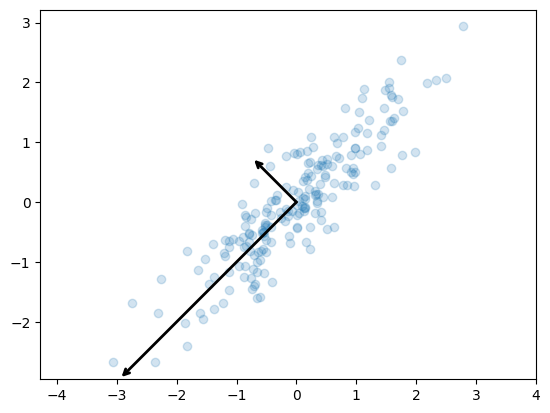

In [7]:
#파라미터 설정
arrowprops = dict(arrowstyle='->',
                 linewidth=2,
                 shrinkA=0, shrinkB=0)

#화살표를 그리기 위한 함수
def draw_vector(v0, v1):
    plt.gca().annotate('', v1, v0, arrowprops=arrowprops)

#원본 데이터 그래프
plt.scatter(X_std[:, 0], X_std[:, 1], alpha=0.2)

#주성분 분석의 두 개 축을 화살표로 나타냄
for length, vector in zip(pca.explained_variance_, pca.components_):
    v = vector * 3 * np.sqrt(length)
    draw_vector(pca.mean_, pca.mean_+v)

plt.axis('equal');

화살표이 주성분 분석으로 얻어진 새로운 변수(특징) 공간의 축 방향이다.

분산이 최대가 되는 방향이 제1 주성분으로 결정되고, 제2 주성분 벡터와 직교한다는 것을 알 수 있다.

원본 데이터의 산점도에서 분산이 최대가 되는 방향의 벡터가 제1 주성분이고 그 다음으로 분산이 큰 방향의 벡터가 제2 주성분이다.

제1 주성분과 제2 주성분은 직교(orthogonal)한다.

__주성분 분석의 활용__

1. 각 주성분과 목표변수와의 관계를 명확하게 밝히려 할 때

2. 각 주성분과 원래 변수의 관계로부터 원래 변수와 목표변수와의 관계를 해석할 때

3. 예측 모델을 구축하기 위해 변수의 개수를 줄여야 할 때(차원 감소)